In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#lalalala
#==================================#
#      Konstanta FISIKA            #
#==================================#
# 1/2 CD Rho V^2 + mg = m*a --> (Cd Rho V^2)/2m + g = a

def calculate_constant(mass,gravity , C_Drag, Area, rho):
    
    A = np.array([0, 0, -gravity])
    B_temp = -(C_Drag * rho * Area) / (2 * mass)
    B = np.array([B_temp,B_temp,B_temp])
    return A,B

#==================================#
#           Data dari FIBA         #
#==================================#
#Sementara pake bola size 6
MASS = 0.550
CIRCUMFERENCE = 0.730
RADIUS = CIRCUMFERENCE/(2*np.pi)
AREA = np.pi*RADIUS*RADIUS
RHO = 1.204
GRAVITY = 9.80
DRAG = 0.54
COR_HOOP = 0.6
COR_RING = 0.65
COR_RINGPLATE = 0.6

#KONSTANTA SIMULASI
ConstA, ConstB = calculate_constant(MASS,GRAVITY,DRAG,AREA,RHO)
print(f"A = {ConstA}\nB = {ConstB}")


#==================================#
#          Koordinat Lapangan   
#==================================#

#Backpost
BackPostX = 6.8
BackPostY = [-900,900]
BackPostZ = [2.43-0.150,2.43-0.150+1.050]

#RingPlate
RingPlateX = [6.8,(6.8-0.151)]
RingPlateY = [-0.075,0.075]
RingPlateZ = [2.43]

#Ring
RingCenter = [6.8, 0, 2.43] #X,Y,Z
RingDiameter = 0.450


#================================#
#           Cek Tabrakan         #
#================================#
def CheckCollision (X,Y,Z):
    CollisionEvent = 0
    #Backpost
    if np.isclose(X,BackPostX, atol= 0.01) and BackPostY[0]<=Y<=BackPostY[1] and BackPostZ[0]<=Z<=BackPostZ[1]:
        CollisionEvent = 1
    
    #Ringplate
    if RingPlateX[0]<=X<=RingPlateX[1] and RingPlateY[0]<=Y<=RingPlateY[1] and np.isclose(RingPlateZ,Z, atol=0.01):
        CollisionEvent = 2

    #Ring Hitbox
    if (X-RingCenter[0])**2 + (Y-RingCenter[1])**2 <= RingDiameter and np.isclose(RingCenter[2]):
        CollisionEvent = 3 
    return CollisionEvent

A = [ 0.   0.  -9.8]
B = [-0.02506475 -0.02506475 -0.02506475]


In [3]:

#==================================#
#         SHOOTER FAHMI            #
#==================================#
def ShooterFahmi (X,Y,Z,Elevation,Rotation): #Sudut sementara dalam degree dan X,Y,Z koordinat Robot. (Hanya Shooter)

    #Spesifikasi Shooter 
    CenterToShaftX = -0.175
    RollerDiameter = 0.240
    CenterToShaftZ = 0.050 
    ShooterLength = 0.350 
    Vmaks = 12

    #Konversi Sudut
    ShaftAngle = np.deg2rad(90-Elevation)
    Elevation = np.deg2rad(Elevation)
    Rotation = np.deg2rad(Rotation)


    #Perhitungan Posisi Bola saat ditembak
    InitialX = X - (CenterToShaftX + ((ShooterLength-RollerDiameter)/2 + RollerDiameter)*np.cos(ShaftAngle))*np.cos(Rotation)
    InitialY = Y + (CenterToShaftX + ((ShooterLength-RollerDiameter)/2 + RollerDiameter)*np.cos(ShaftAngle))*np.sin(Rotation)
    InitialZ = Z + CenterToShaftZ + ((ShooterLength-RollerDiameter)/2 + RollerDiameter)*np.sin(Elevation)
    return InitialX,InitialY,InitialZ,Vmaks

Elevation = 60
Rotation = 0
X = 0
Y = 0
Z = 0

Speed = np.array([0, 0, 0])
InitialState = np.array(ShooterFahmi(X,Y,Z,Elevation,Rotation))
InitialState = np.around(np.append(InitialState,Speed),decimals=3)

print(f"Robot initial State = {InitialState}")

Robot initial State = [-0.08   0.     0.305 12.     0.     0.     0.   ]


In [4]:
#===========================#
#       NickoPegas          #
#===========================#

def ShooterNicko (X,Y,Z,Elevation,Rotation):
   
   #Spesifikasi Shoter
   CenterToShaftX = -0.155
   CenterToShaftZ = 0.130
   
   
   ShooterLength = 0.650
   ShaftToShooterZ = 0.150
   #KonversiSudut
   ShaftAngle = np.deg2rad(Elevation)
   Rotation = np.deg2rad(Rotation)


   #Perhitungan
   InitialX = X + (CenterToShaftX-ShaftToShooterZ*np.sin(ShaftAngle)+ShooterLength*np.cos(ShaftAngle))*np.cos(Rotation)
   InitialY = Y + (CenterToShaftX-ShaftToShooterZ*np.sin(ShaftAngle)+ShooterLength*np.cos(ShaftAngle))*np.sin(Rotation)
   InitialZ = Z + CenterToShaftZ + ShaftToShooterZ*np.cos(ShaftAngle) + ShooterLength*np.sin(ShaftAngle)
   
   return InitialX,InitialY,InitialZ

Elevation = 30
Rotation = 90
X = 0
Y = 0
Z = 0

Speed = np.array([0, 0, 0])
InitialState = np.array(ShooterNicko(X,Y,Z,Elevation,Rotation))
InitialState = np.around(np.append(InitialState,Speed),decimals=3)


print(f"Robot initial State = {InitialState}")

Robot initial State = [0.    0.333 0.585 0.    0.    0.   ]


[6.68319956 0.         7.63940502]
2


<function matplotlib.pyplot.show(close=None, block=None)>

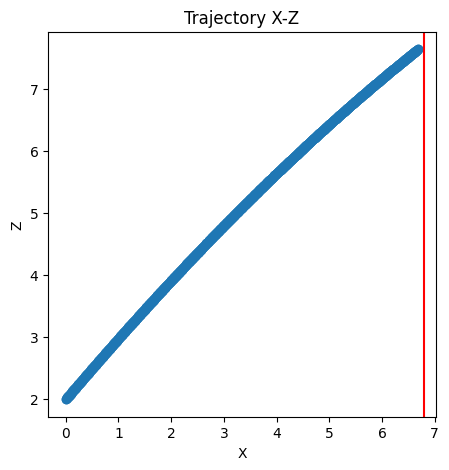

In [5]:
#======================#
#       ODE SISTEM     #
#======================#
# sigma f = gravity + 1/2 Cd A V kuadrat
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
def ode_system(t, state):
    x, y, z, Vx, Vy, Vz = state
    dxdt = Vx
    dydt = Vy
    dzdt = Vz
    dVxdt = ConstA[0] + ConstB[0] * Vx**2
    dVydt = ConstA[1] + ConstB[1] * Vy**2
    dVzdt = ConstA[2] + ConstB[2] * Vz**2
    return [dxdt, dydt, dzdt, dVxdt, dVydt, dVzdt]


#==============================#
#       Collision Event        #
#==============================#
def Groundhit (t,y):
    return y[2] - 0
Groundhit.terminal = True
Groundhit.direction = -1 #Trigger when decreasing

BackPostX = 6.8
def BackPosthit (t,y):
    return y[0] - (6.8-RADIUS) #--> Backpost X posisition, ntah kenapa ga work kalau dimasukin variabel
BackPosthit.terminal = True
BackPosthit.direction = 1
    

#=========================#
#   Entry speed Vector    #
#=========================#
def DirectionVector (ImpactVelocity): #Tested
    VX,VY,VZ = ImpactVelocity
    Rotation = np.arctan(VY/VX)
    Elevation = np.arctan(VZ/(np.sqrt(VY**2+VZ**2)))
    return np.rad2deg([Rotation,Elevation])

#========================#
#   Cari Kecepatan Awal  #
#========================#
def GetInitVel (Rotation,Elevation,Velocity):#Tested
    Rotation = np.deg2rad(Rotation)
    Elevation = np.deg2rad(Elevation)
    VX = Velocity*np.cos(Elevation)*np.cos(Rotation)
    VY = Velocity*np.cos(Elevation)*np.sin(Rotation)
    VZ = Velocity*np.sin(Elevation)
    return VX,VY,VZ

#=======================#
# Cari Kecepatan Bounce #
# =======================#
def GetBounceVel (BounceType,State): #--> Tested tapi kurang Ring Collision
   if BounceType == 2: #BackPost
      COR = COR_HOOP
      Damping = COR_HOOP #--> Mungkin masih butuh konfirmasi
      State[3] = State[3]*-COR
      State[4] = State[4]*Damping
      State[5] = State[5]*Damping
   
   if BounceType == 3: #RingPlate
      COR = COR_RINGPLATE
      Damping = COR_RINGPLATE #--> Mungkin masih butuh konfirmasi
      State[3] = State[3]*Damping
      State[4] = State[4]*Damping
      State[5] = State[5]*-COR

   
   return State

X0 = 0
Y0 = 0
Z0 = 2
VX0 = 15
VY0 = 0
VZ0 = 15
InitialState = [X0,Y0,Z0,VX0,VY0,VZ0]
timestart = 0
timestop = 20
solutiondensity = 40000

#Jumlah T_eval = TimeStop/SolutionDensity --> regardless berapa waktu sampai time stop
Trajectory = solve_ivp(ode_system, [timestart,timestop], InitialState, events=[Groundhit,BackPosthit],t_eval=np.linspace(timestart,timestop,solutiondensity), dense_output=True )



#==========================================#
#          Ambil Posisi Tabrakan           #
#==========================================#

LastState = np.array([Trajectory.y[0,-1],Trajectory.y[1,-1],Trajectory.y[2,-1]])
SpeedVector = np.array([Trajectory.y[3,-1],Trajectory.y[4,-1],Trajectory.y[5,-1]])
print(LastState)

#=====================#
#  Cek tipe Kolisi    #
#=====================#
CollisionEvent = 0
if Trajectory.t_events[0].size>0:
    CollisionEvent = 1
if Trajectory.t_events[1].size>0:
    CollisionEvent = 2

# MaxCollision = 1
# CollisionEvent = 0
# for i in range(MaxCollision):
#     if Trajectory.t_events[i].size>0:
#         CollisionEvent = i+1

print(CollisionEvent)


#Kondisi terminasi simulasi
#Nilai Z TURUN dibawah 200

#========================#
#    Visualisasi Data    #
#========================#

#X-Z plane
plt.figure(figsize=(5,5))
plt.scatter(Trajectory.y[0],Trajectory.y[2],label = 'X-Z plane')
plt.title('Trajectory X-Z')
plt.xlabel('X')
plt.ylabel('Z')
plt.axvline(6.8,color = 'r')
# plt.axhline(0,0,Trajectory.y[0,-1],color = 'k')

plt.savefig('X-Z Plane')

plt.show


New loop with initial state  = [-0.0335965   0.          2.2585965   8.35637088  1.47345365  8.48528137]
Sim is done, with exit event = [array([], dtype=float64), array([0.87549631])]
Groundhit = []
BPBounce = [0.87549631]
Last state benda = [ 6.68046671  1.26890976  5.61212274  7.0620589   1.42732799 -0.55981448]
Event Detected = 3
Sim baru dibuat dengan InitState = [ 6.68046671  1.26890976  5.61212274 -4.23723534  0.85639679 -0.33588869]
Loop Done
New loop with initial state  = [ 6.68046671  1.26890976  5.61212274 -4.23723534  0.85639679 -0.33588869]
Sim is done, with exit event = [array([1.01071651]), array([], dtype=float64)]
Groundhit = [1.01071651]
BPBounce = []
Last state benda = [ 2.15096766e+00  2.12506798e+00  2.15482240e-03 -4.74666693e+00
  8.38214821e-01 -1.13029580e+01]
Event Detected = 2


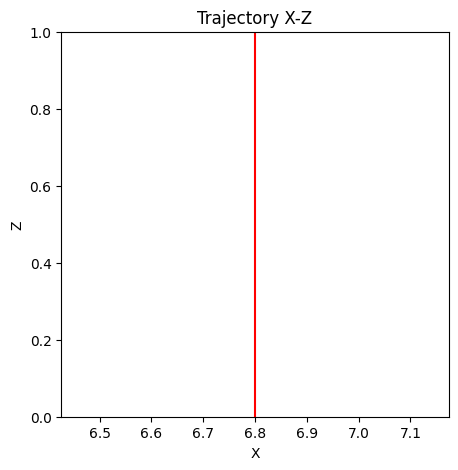

In [6]:
#============================#
#    Percobaan Looping       #
#============================#


#InitArg
X0 = 0
Y0 = 0
Z0 = 2
VOutput = 12

Rotation = 0
Elevation = 45 #--> Dalam derajat
IsShooterFahmi=True
IsAirBorn = True
#Case shooter Fahmi
if IsShooterFahmi:
   ShooterCond = ShooterFahmi(X0,Y0,Z0,Elevation,Rotation)
   InitialState = [ShooterCond[0],ShooterCond[1],ShooterCond[2]]
   SpeedMax = ShooterCond[3]

InitVel = GetInitVel(10,45,VOutput)
InitialState = np.append(InitialState,InitVel)
#print(InitialState)
Event_Num = 5

while IsAirBorn:
    # TempData = []

    print(f"New loop with initial state  = {InitialState}")
    Trajectory = solve_ivp(ode_system, [timestart,timestop], InitialState, events=[Groundhit,BackPosthit],t_eval=np.linspace(timestart,timestop,solutiondensity), dense_output=True)
    print(f"Sim is done, with exit event = {Trajectory.t_events}\nGroundhit = {Trajectory.t_events[0]}\nBPBounce = {Trajectory.t_events[1]}")
    print(f"Last state benda = {Trajectory.y[:,-1]}")

    # TempData.append(Trajectory.y[:,-1])
    

    #CollisionCheck
    
    CollisionEvent = -1 #--> Default
    if Trajectory.t_events[0].size>0:
        #And Another Var.check
        CollisionEvent = 2 #-->Ground
    if Trajectory.t_events[1].size>0:
        #And Another Var Check --> if fail --> State 0 --> Pass last Initial State
        CollisionEvent = 3 #-->Backpost

    print(f"Event Detected = {CollisionEvent}")

    #Ground Termination
    if CollisionEvent == 2:
        break

    #Backpost Tabrak
    if CollisionEvent == 3:
        InitialState = GetBounceVel(2,Trajectory.y[:,-1])
        print(f"Sim baru dibuat dengan InitState = {InitialState}")

    print(f"Loop Done")
    plt.figure(figsize=(5,5))
    # plt.scatter(TempData[0],TempData[2],label = 'X-Z plane')
    plt.title('Trajectory X-Z')
    plt.xlabel('X')
    plt.ylabel('Z')
    plt.axvline(6.8,color = 'r')
    # plt.axhline(0,0,Trajectory.y[0,-1],color = 'k')

    plt.savefig('X-Z Plane')

    plt.show




    




In [19]:
#=================================================IMPROVEMENT PENDING================================================#

def GetBounceVel (BounceType,State):
   if BounceType == 2: #BackPost
      COR = COR_HOOP
      Damping = COR_HOOP #--> Mungkin masih butuh konfirmasi
      State[3] = State[3]*-COR
      State[4] = State[4]*Damping
      State[5] = State[5]*Damping
   
   if BounceType == 3: #RingPlate
      COR = COR_RINGPLATE
      Damping = COR_RINGPLATE #--> Mungkin masih butuh konfirmasi
      State[3] = State[3]*Damping
      State[4] = State[4]*Damping
      State[5] = State[5]*-COR

   
   return State


def Ring_NormalVector (X,Y,Z,State):
   # X,Y,Z --> Impact Point
   #==========================#
   #    Toroid Normal Vector  #

   R = 0.450 #--> Major Radius
   r = 0.040 #--> Minor Radius


In [ ]:
#==============================================FUNCTION TESTER=====================================================#


TypeError: CheckCollision() missing 2 required positional arguments: 'Y' and 'Z'

<function matplotlib.pyplot.show(close=None, block=None)>

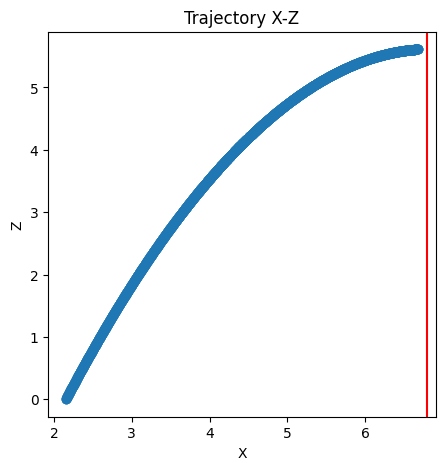

In [9]:
#==================================================Plotting PlaceHolder===========================================#
plt.figure(figsize=(5,5))
plt.scatter(Trajectory.y[0],Trajectory.y[2],label = 'X-Z plane')
plt.title('Trajectory X-Z')
plt.xlabel('X')
plt.ylabel('Z')
plt.axvline(6.8,color = 'r')
# plt.axhline(0,0,Trajectory.y[0,-1],color = 'k')

plt.savefig('X-Z Plane')

plt.show

Post-collision velocity components: 1.5999999999999996 2.4000000000000004 -3.2


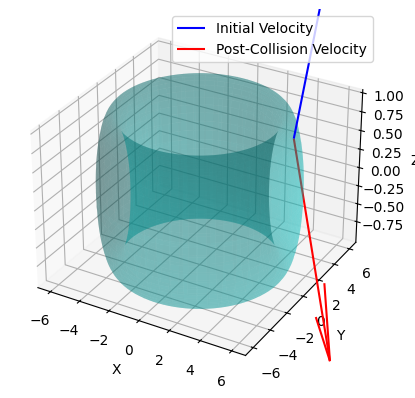

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def toroid_normal_vector(R, r, XT, YT, ZT, XI, YI, ZI):
    # Translate the collision point to the toroid's local coordinate system
    x_prime = XI - XT
    y_prime = YI - YT
    z_prime = ZI - ZT
    
    # Convert the collision point to toroidal coordinates (theta, phi)
    theta = np.arcsin(z_prime / r)
    phi = np.arctan2(y_prime, x_prime - R)
    
    # Partial derivatives with respect to theta and phi
    dR_dtheta = np.array([-r * np.sin(theta) * np.cos(phi), -r * np.sin(theta) * np.sin(phi), r * np.cos(theta)])
    dR_dphi = np.array([-(R + r * np.cos(theta)) * np.sin(phi), (R + r * np.cos(theta)) * np.cos(phi), 0])
    
    # Normal vector is the cross product of the partial derivatives
    normal_vector = np.cross(dR_dtheta, dR_dphi)
    
    # Normalize the normal vector
    normal_vector = normal_vector / np.linalg.norm(normal_vector)
    return normal_vector

def post_collision_velocity(ImpactVel, normal_vector, damping_factor):
    # Normalize the normal vector
    n = normal_vector / np.linalg.norm(normal_vector)
    
    # Decompose the impact velocity
    v_normal = np.dot(ImpactVel, n) * n
    v_tangential = ImpactVel - v_normal
    
    # Apply the Coefficient of Restitution and damping factor
    v_normal_after = -v_normal * damping_factor
    v_tangential_after = v_tangential * damping_factor
    
    # Calculate the post-collision velocity
    v_after = v_normal_after + v_tangential_after
    return v_after

# Example usage
R = 5  # Major radius
r = 1  # Minor radius
XT, YT, ZT = 0, 0, 0  # Center of the toroid
XI, YI, ZI = 6, 0, 1  # Collision point
VX, VY, VZ = 2, 3, 4  # Velocity before impact
damping_factor = 0.8  # Example damping factor

# Calculate the normal vector at the collision point
normal_vector = toroid_normal_vector(R, r, XT, YT, ZT, XI, YI, ZI)

# Calculate the post-collision velocity
ImpactVel = np.array([VX, VY, VZ])
v_after = post_collision_velocity(ImpactVel, normal_vector, damping_factor)

# Output the post-collision velocity components
VX_prime, VY_prime, VZ_prime = v_after
print("Post-collision velocity components:", VX_prime, VY_prime, VZ_prime)

# Visualization of input and output velocity vectors and toroid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot initial velocity vector
ax.quiver(XI, YI, ZI, VX, VY, VZ, color='b', label='Initial Velocity')

# Plot post-collision velocity vector
ax.quiver(XI, YI, ZI, VX_prime, VY_prime, VZ_prime, color='r', label='Post-Collision Velocity')

# Plot toroid surface for visualization
theta = np.linspace(0, 2*np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
theta_grid, phi_grid = np.meshgrid(theta, phi)

x_toroid = (R + r*np.cos(theta_grid)) * np.cos(phi_grid) + XT
y_toroid = (R + r*np.cos(theta_grid)) * np.sin(phi_grid) + YT
z_toroid = r * np.sin(theta_grid) + ZT

ax.plot_surface(x_toroid, y_toroid, z_toroid, color='c', alpha=0.3)

# Set plot labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()